In [1]:
import price_optim
import numpy as np
import pandas as pd
from pathlib import Path

## Instantiate main object

In [2]:
price_model = price_optim.PriceOptim()

## Load data

In [3]:
prod_data = pd.read_excel(Path(price_model.path_data / 'raw/Product_data.xlsx'), sheet_name="Data")
trans_data = pd.read_excel(Path(price_model.path_data / 'raw/Transaction_data.xlsx'), sheet_name="Data")

## Preparing and cleaning data

In [4]:
merged_data = price_model.data_process_cww(prod_data, trans_data)

/home/sam_c/project/Mar22_CWW/src/price_optim.py:68: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data['p_id'] = merged_data['p_id_y'].astype('str').str.replace(r'v\d', '')
/home/sam_c/project/Mar22_CWW/src/price_optim.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color_simple'][ii] = replace_colour[jj]


unique products in knits (p_id): 24
unique products in knits (p_id_x): 20
unique products in knits (p_id_y): 26
unique products in knits (style): 23
unique products in dresses (p_id): 42
unique products in dresses (p_id_x): 38
unique products in dresses (p_id_y): 47
unique products in dresses (style): 39


## Resampling original data

knit data shape: (1129, 7)
resampled data shape: (90320, 7)
knit data unique products: 24
resampled data unique products: 24


/home/sam_c/project/Mar22_CWW/src/price_optim.py:224: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/sam_c/project/Mar22_CWW/src/price_optim.py:229: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/sam_c/project/Mar22_CWW/src/price_optim.py:234: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/sam_c/project/Mar22_CWW/src/price_optim.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


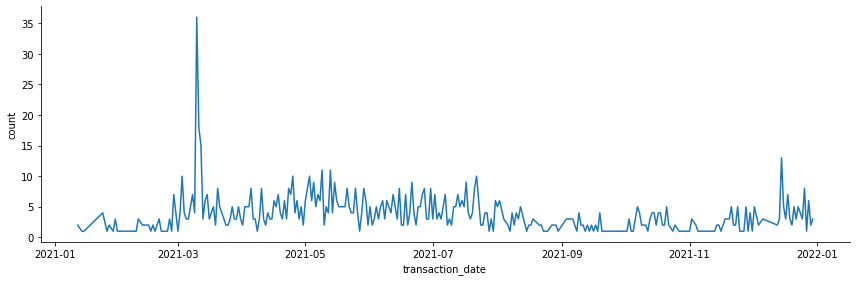

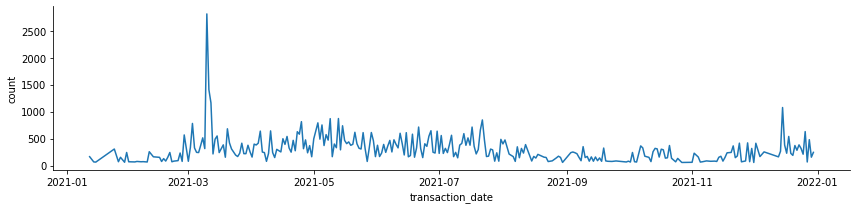

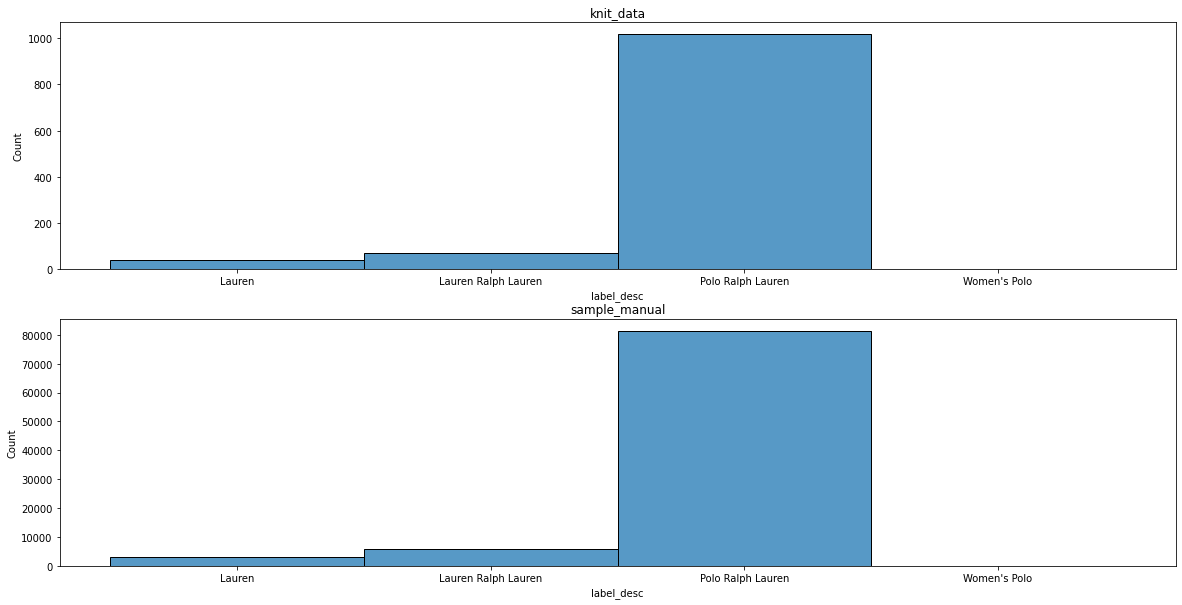

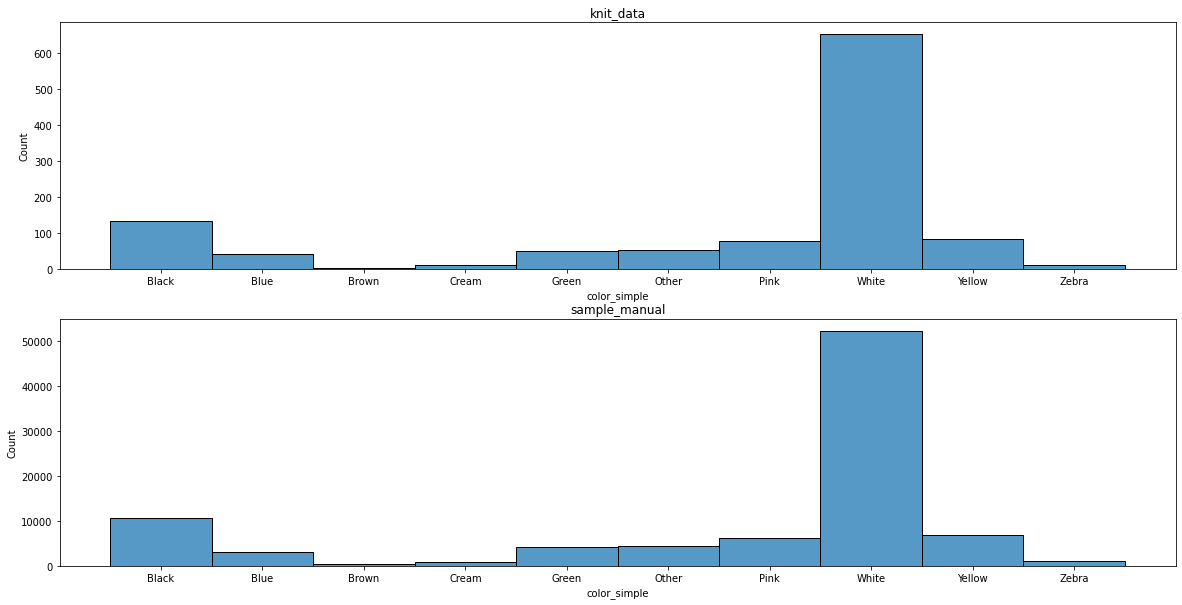

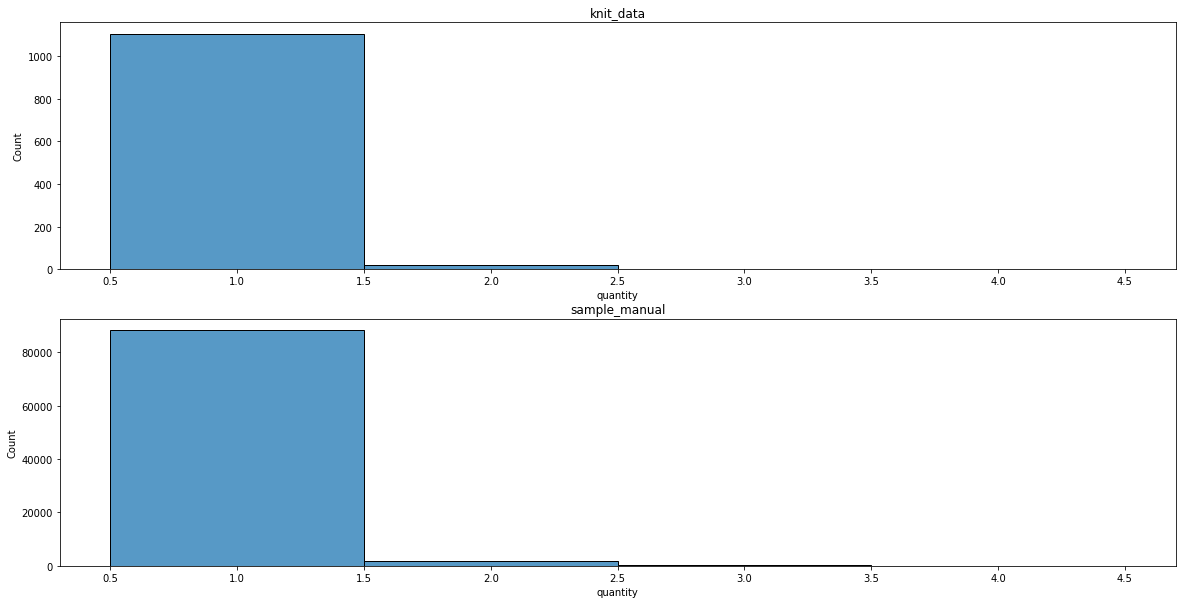

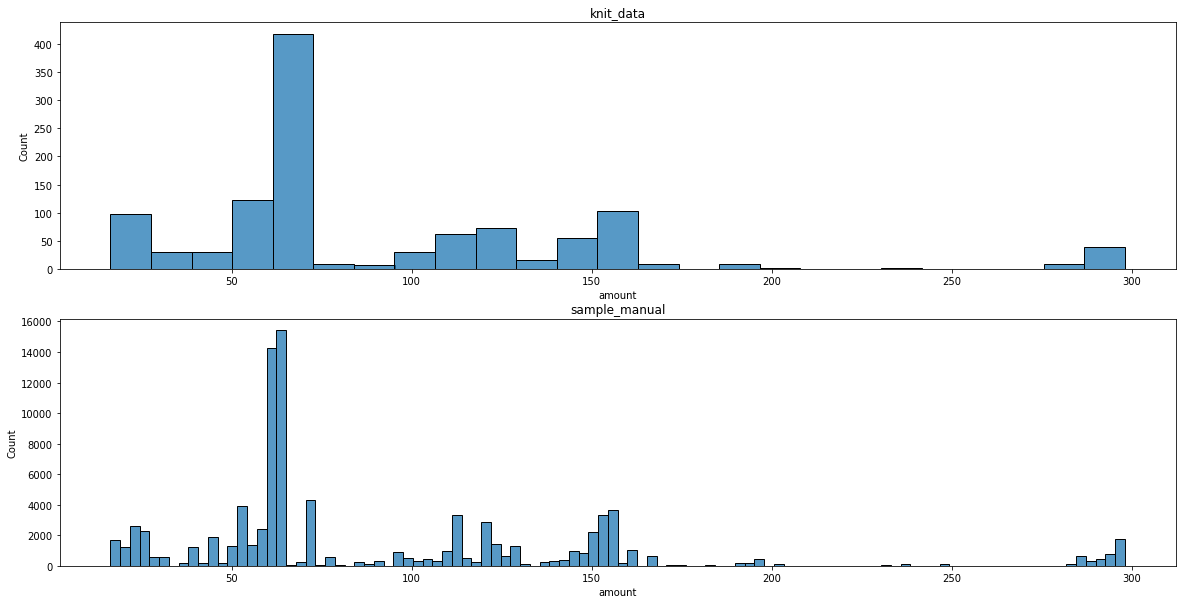

In [5]:
syn_data = price_model.data_synthesis(merged_data)

## Additional data preparation, including aggregating data by week, generating engineered columns, appending synthetic star rating and sentiment columns, and adding google trend data for items in the subdepartment of interest and the colour of items considered.

In [6]:
processed_data = price_model.feature_add(syn_data)

/home/sam_c/s2ds/codewww/lib64/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Demand prediction

In [7]:
demand_matrix, prices, sum_prices = price_model.predict_demand(processed_data)

[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [142. 142. 142. ... 135. 135. 135.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 ...

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [ 89.  89.  89. ... 105. 104. 104.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   

## Price optimization

In [8]:
optimal_prices, revenue_prediction = price_model.lp_mip_solver(demand_matrix, np.array(prices), sum_prices)
print('Real Prices:' + str(price_model.actual_prices) + '\nReal Revenue: ' + str(price_model.total_revenue) + '\nPredicted Prices :' + str(optimal_prices) + '\nPredicted Revenue: ' + str(revenue_prediction))

/home/sam_c/project/Mar22_CWW/src/price_optim.py:636: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  lp_sol = linprog(-r.flatten(), A_eq=A, b_eq=b)  # calling and initialiasing the model
/home/sam_c/project/Mar22_CWW/src/price_optim.py:636: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  lp_sol = linprog(-r.flatten(), A_eq=A, b_eq=b)  # calling and initialiasing the model
/home/sam_c/s2ds/codewww/lib64/python3.7/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=5.60496e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/sam_c/s2ds/

Welcome to the CBC MILP Solver 
Version: devel 
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 9 (0) rows, 40 (0) columns and 80 (0) elements
Clp1000I sum of infeasibilities 4.19541e-05 - average 4.66156e-06, 14 fixed columns
Coin0506I Presolve 5 (-4) rows, 20 (-20) columns and 40 (-40) elements
Clp0029I End of values pass after 20 iterations
Clp0000I Optimal - objective value 86800
Clp0000I Optimal - objective value 86800
Coin0511I After Postsolve, objective 86800, infeasibilities - dual 0 (0), primal 0 (0)
Clp0000I Optimal - objective value 86800
Clp0000I Optimal - objective value 86800
Clp0000I Optimal - objective value 86800
Clp0032I Optimal objective 86800 - 0 iterations time 0.002, Idiot 0.00

Starting MIP optimization
Real Prices:[39.38, 67.28, 105.62, 54.63, 104.29, 162.18, 292.07, 194.03]
Real Revenue: 228210.49
Predicted Prices :[220. 420. 120. 420. 120. 320. 320. 220.]
Predicted Revenue: 86800